In [19]:
from google.colab import files
uploaded =  files.upload()

Saving cycle_cost_raw_unclean.csv to cycle_cost_raw_unclean (2).csv


In [20]:
import pandas as pd

df = pd.read_csv("cycle_cost_raw_unclean.csv")
print("Shape:", df.shape)
df.info()
df.head()


Shape: (300, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RecordID        300 non-null    object 
 1   PartID          300 non-null    object 
 2   Date            300 non-null    object 
 3   Material        294 non-null    object 
 4   CycleTime_s     294 non-null    float64
 5   CostPerUnitINR  300 non-null    float64
 6   Supplier        300 non-null    object 
dtypes: float64(2), object(5)
memory usage: 16.5+ KB


,RecordID,PartID,Date,Material,CycleTime_s,CostPerUnitINR,Supplier
0,C20000,P001,2025-09-13,POM,34.6,137.41,SupplierD
1,C20001,P005,2025-07-20,ABS,31.2,70.44,SupplierD
2,C20002,P009,2025-09-26,PP,30.2,62.67,SupplierB
3,C20003,P003,2025-07-15,PP,44.0,61.28,SupplierB
4,C20004,P008,2025-08-17,PP,24.5,59.09,SupplierB


In [21]:
# Step 2.1 — Missing Value Summary


missing_counts = df.isnull().sum()
missing_percent = df.isnull().mean() * 100

missing_summary = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Missing_%': missing_percent.round(2)
}).sort_values(by='Missing_%', ascending=False)

missing_summary.head(10)


,Missing_Count,Missing_%
Material,6,2.0
CycleTime_s,6,2.0
RecordID,0,0.0
Date,0,0.0
PartID,0,0.0
CostPerUnitINR,0,0.0
Supplier,0,0.0


In [22]:
# Step 2.2 — Duplicate Check
duplicate_count = df.duplicated().sum()
total_rows = len(df)

print(f"Total rows: {total_rows}")
print(f"Duplicate rows: {duplicate_count}")
print(f"Duplicate %: {(duplicate_count / total_rows) * 100:.2f}%")


Total rows: 300
Duplicate rows: 0
Duplicate %: 0.00%


=== Summary Statistics ===


,count,mean,std,min,25%,50%,75%,max
CycleTime_s,294.0,39.684014,65.290168,2.0,29.7000,33.200,37.30,1000.0
CostPerUnitINR,300.0,98.108467,80.960697,-100.0,62.3025,90.605,132.76,1000.0



=== Outlier Summary (profile only) ===


,Feature,Outlier_Count,Outlier_%
0,CycleTime_s,3,1.0
1,CostPerUnitINR,3,1.0


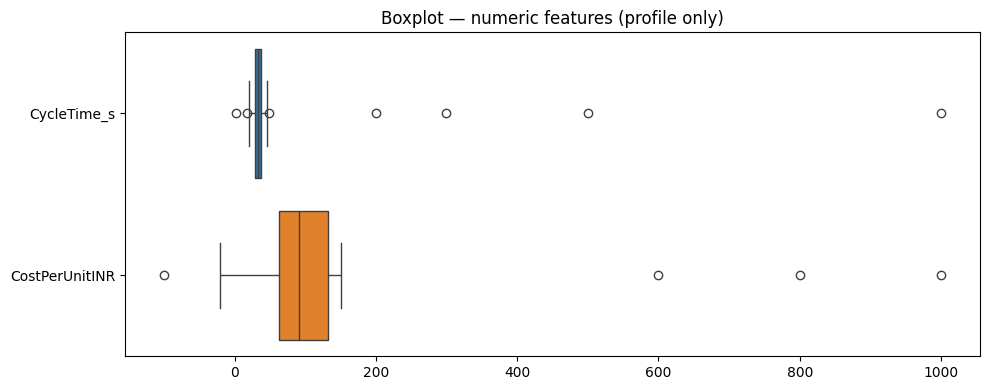

In [24]:
# Step 2.3 — Outlier Summary (PROFILE ONLY)
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# load (same file you used)
df = pd.read_csv("cycle_cost_raw_unclean.csv")

# numeric cols
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# summary stats
print("=== Summary Statistics ===")
display(df[numeric_cols].describe().T)

# compute z-scores for numeric cols (omit NaNs)
z_scores = np.abs(stats.zscore(df[numeric_cols], nan_policy='omit'))

# mark outliers beyond 3 sigma
outlier_mask = (z_scores > 3)
outlier_counts = outlier_mask.sum(axis=0)
outlier_pct = np.round(100 * outlier_counts / len(df), 2)

outlier_summary = pd.DataFrame({
    'Feature': numeric_cols,
    'Outlier_Count': outlier_counts,
    'Outlier_%': outlier_pct
})

print("\n=== Outlier Summary (profile only) ===")
display(outlier_summary)

# Boxplot visual (profile only) — save image for PPT
plt.figure(figsize=(10,4))
sns.boxplot(data=df[numeric_cols], orient='h')
plt.title("Boxplot — numeric features (profile only)")
plt.tight_layout()
plt.savefig("missing_boxplot_profile.png", dpi=200)
plt.show()


Correlation matrix (profile):


,CycleTime_s,CostPerUnitINR
CycleTime_s,1.000,0.024
CostPerUnitINR,0.024,1.000


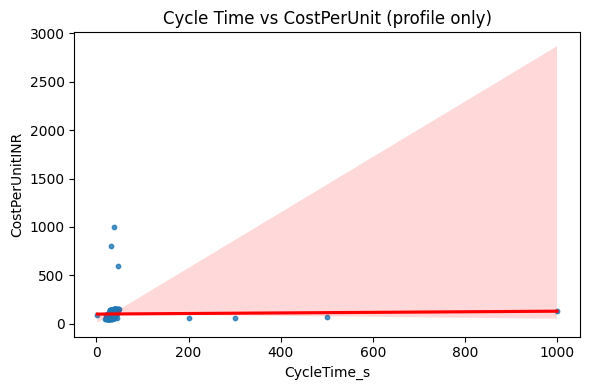

In [25]:
# Step 2.4 — Correlation & Scatter (PROFILE ONLY)
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure columns exist
cols_needed = ['CycleTime_s','CostPerUnitINR']
for c in cols_needed:
    if c not in df.columns:
        raise ValueError(f"Missing column: {c}")

# Correlation
corr = df[cols_needed].corr().round(3)
print("Correlation matrix (profile):")
display(corr)

# Scatter with trendline (profile only)
plt.figure(figsize=(6,4))
sns.regplot(x='CycleTime_s', y='CostPerUnitINR', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title("Cycle Time vs CostPerUnit (profile only)")
plt.tight_layout()
plt.savefig("cycle_vs_cost_scatter_profile.png", dpi=200)
plt.show()


In [26]:
# Step 2.5 — Profile snapshot (PROFILE ONLY)
profile_snapshot = {
    'total_rows': [len(df)],
    'total_columns': [df.shape[1]],
    'missing_Material_pct': [round(df['Material'].isnull().mean()*100,2) if 'Material' in df.columns else 0],
    'missing_CycleTime_pct': [round(df['CycleTime_s'].isnull().mean()*100,2) if 'CycleTime_s' in df.columns else 0],
    'duplicates_full_count': [int(df.duplicated().sum())],
    'cycle_min': [df['CycleTime_s'].min()],
    'cycle_max': [df['CycleTime_s'].max()],
    'cost_min': [df['CostPerUnitINR'].min()],
    'cost_max': [df['CostPerUnitINR'].max()]
}
pd.DataFrame(profile_snapshot).to_csv("profile_snapshot_project2.csv", index=False)
print("Saved -> profile_snapshot_project2.csv")
display(pd.DataFrame(profile_snapshot).T)


Saved -> profile_snapshot_project2.csv


,0
total_rows,300.0
total_columns,7.0
missing_Material_pct,2.0
missing_CycleTime_pct,2.0
duplicates_full_count,0.0
cycle_min,2.0
cycle_max,1000.0
cost_min,-100.0
cost_max,1000.0


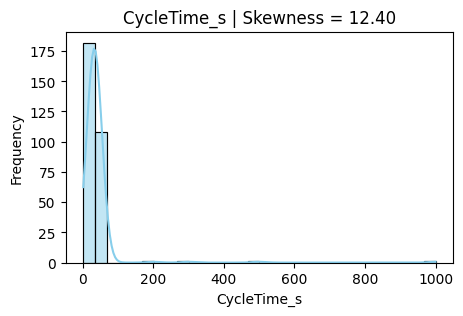

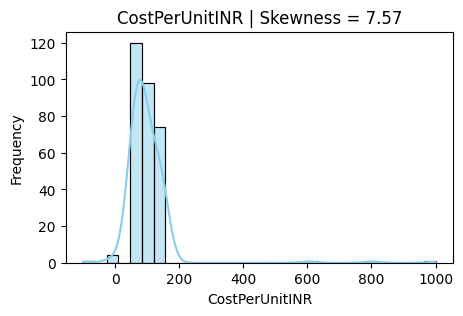

In [27]:
# Step 2.5 — Distribution & Skewness Check
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['CycleTime_s', 'CostPerUnitINR']

for col in numeric_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'{col} | Skewness = {df[col].skew():.2f}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [28]:
# Step 2.6 — Kurtosis Check
for col in numeric_cols:
    print(f"{col}: Kurtosis = {df[col].kurtosis():.2f}")


CycleTime_s: Kurtosis = 169.62
CostPerUnitINR: Kurtosis = 74.04


In [29]:
# Step 2.7 — Invalid Value / Business Rule Check
invalid_cost = df[df['CostPerUnitINR'] < 0]
invalid_cycle = df[df['CycleTime_s'] <= 0]

print(f"Invalid cost records: {len(invalid_cost)}")
print(f"Invalid cycle time records: {len(invalid_cycle)}")


Invalid cost records: 3
Invalid cycle time records: 0


In [30]:
# --- STEP 1: Handle missing values (Material & CycleTime_s) ---

import pandas as pd
import numpy as np

# (Load raw dataset if not already loaded)
df = pd.read_csv("cycle_cost_raw_unclean.csv")

# Show initial missing counts
print("Missing before:\n", df[['Material','CycleTime_s']].isna().sum())

# Impute Material with mode (most frequent)
if df['Material'].isna().any():
    mat_mode = df['Material'].mode().iloc[0]
    df['Material'] = df['Material'].fillna(mat_mode)
    print(f"\nFilled Material missing with mode → {mat_mode}")

# Impute CycleTime_s with median (robust to outliers)
if df['CycleTime_s'].isna().any():
    cyc_median = df['CycleTime_s'].median()
    df['CycleTime_s'] = df['CycleTime_s'].fillna(cyc_median)
    print(f"Filled CycleTime_s missing with median → {cyc_median}")

# Verify after
print("\nMissing after:\n", df[['Material','CycleTime_s']].isna().sum())

# Quick preview
df.head()


Missing before:
 Material       6
CycleTime_s    6
dtype: int64

Filled Material missing with mode → POM
Filled CycleTime_s missing with median → 33.2

Missing after:
 Material       0
CycleTime_s    0
dtype: int64


,RecordID,PartID,Date,Material,CycleTime_s,CostPerUnitINR,Supplier
0,C20000,P001,2025-09-13,POM,34.6,137.41,SupplierD
1,C20001,P005,2025-07-20,ABS,31.2,70.44,SupplierD
2,C20002,P009,2025-09-26,PP,30.2,62.67,SupplierB
3,C20003,P003,2025-07-15,PP,44.0,61.28,SupplierB
4,C20004,P008,2025-08-17,PP,24.5,59.09,SupplierB


In [31]:
# --- STEP 2: Fix invalid / negative Cost values ---

# Identify invalid costs
invalid_costs = df[df['CostPerUnitINR'] < 0]
print(f"Invalid cost records found: {len(invalid_costs)}")

# Replace negative costs with median of valid values
valid_cost_median = df.loc[df['CostPerUnitINR'] >= 0, 'CostPerUnitINR'].median()
df.loc[df['CostPerUnitINR'] < 0, 'CostPerUnitINR'] = valid_cost_median

# Verify correction
print(f"Replaced {len(invalid_costs)} invalid cost values with median = {valid_cost_median:.2f}")

# Double-check min/max
print("\nPost-fix cost range:")
print(f"Min = {df['CostPerUnitINR'].min()} | Max = {df['CostPerUnitINR'].max()}")

df.head()


Invalid cost records found: 3
Replaced 3 invalid cost values with median = 90.79

Post-fix cost range:
Min = 0.0 | Max = 1000.0


,RecordID,PartID,Date,Material,CycleTime_s,CostPerUnitINR,Supplier
0,C20000,P001,2025-09-13,POM,34.6,137.41,SupplierD
1,C20001,P005,2025-07-20,ABS,31.2,70.44,SupplierD
2,C20002,P009,2025-09-26,PP,30.2,62.67,SupplierB
3,C20003,P003,2025-07-15,PP,44.0,61.28,SupplierB
4,C20004,P008,2025-08-17,PP,24.5,59.09,SupplierB


In [32]:
# --- STEP 3: Outlier Detection & Treatment (IQR capping) ---

numeric_cols = ['CycleTime_s', 'CostPerUnitINR']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"\n{col}: {len(outliers)} outliers detected")

    # Cap extreme values to 5th–95th percentile
    lower_cap = df[col].quantile(0.05)
    upper_cap = df[col].quantile(0.95)
    df[col] = np.where(df[col] < lower_cap, lower_cap, df[col])
    df[col] = np.where(df[col] > upper_cap, upper_cap, df[col])

print("\n✅ Outliers capped using 5th–95th percentile range for numeric columns.")
print(df[numeric_cols].describe())



CycleTime_s: 7 outliers detected

CostPerUnitINR: 3 outliers detected

✅ Outliers capped using 5th–95th percentile range for numeric columns.
       CycleTime_s  CostPerUnitINR
count   300.000000      300.000000
mean     33.551167       93.269017
std       5.166637       32.640279
min      24.295000       52.540000
25%      29.775000       62.497500
50%      33.200000       90.790000
75%      37.300000      132.760000
max      43.235000      146.937000


=== Correlation Matrix (Post-Cleaning) ===
                CycleTime_s  CostPerUnitINR
CycleTime_s        1.000000        0.512006
CostPerUnitINR     0.512006        1.000000 



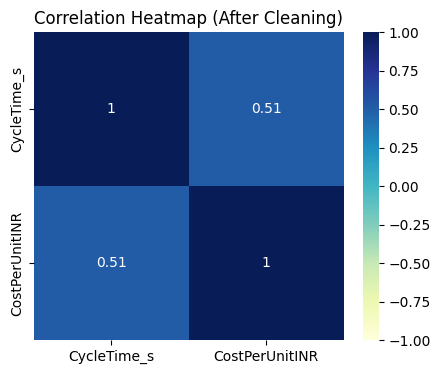

🔥 Strong correlation — cycle time heavily influences cost.


In [35]:
# Step 4 — Re-check Correlation After Cleaning
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numeric columns
corr = df[['CycleTime_s', 'CostPerUnitINR']].corr()

print("=== Correlation Matrix (Post-Cleaning) ===")
print(corr, "\n")

# Visualization
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="YlGnBu", vmin=-1, vmax=1)
plt.title("Correlation Heatmap (After Cleaning)")
plt.show()

# Interpretation
if abs(corr.loc['CycleTime_s','CostPerUnitINR']) < 0.1:
    print("✅ Weak correlation — cost is mostly independent of cycle time.")
elif abs(corr.loc['CycleTime_s','CostPerUnitINR']) < 0.4:
    print("⚙️ Moderate correlation — longer cycles may affect cost slightly.")
else:
    print("🔥 Strong correlation — cycle time heavily influences cost.")


In [36]:
import os

# create folder if it doesn't exist
os.makedirs("02_data_cleaned", exist_ok=True)
print("✅ Folder '02_data_cleaned' created or already exists.")


✅ Folder '02_data_cleaned' created or already exists.


In [38]:
# Save cleaned CSV
df.to_csv('02_data_cleaned/cycle_cost_cleaned.csv', index=False)
print("✅ Saved -> 02_data_cleaned/cycle_cost_cleaned.csv")

# Save Excel version (optional but recommended)
df.to_excel('02_data_cleaned/cycle_cost_cleaned.xlsx', index=False)
print("✅ Saved -> 02_data_cleaned/cycle_cost_cleaned.xlsx")

snapshot_df = pd.read_csv("profile_snapshot_project2.csv")
snapshot_df.to_csv("02_data_cleaned/profile_snapshot_cleaned.csv", index=False)
print("✅ Saved -> 02_data_cleaned/profile_snapshot_cleaned.csv")


✅ Saved -> 02_data_cleaned/cycle_cost_cleaned.csv
✅ Saved -> 02_data_cleaned/cycle_cost_cleaned.xlsx
✅ Saved -> 02_data_cleaned/profile_snapshot_cleaned.csv


In [39]:
from google.colab import files
files.download("02_data_cleaned/cycle_cost_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
files.download("02_data_cleaned/cycle_cost_cleaned.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
from google.colab import files
files.download("02_data_cleaned/profile_snapshot_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>